# 02-Nov-2022

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import pandas as pd
from IPython.display import Image, HTML, display

## Results summary
1. Investigating some details on the Poisson2d unstructured case
  - Solution modes in our update are not orthogonal
  - 
2. Tests on turbulent Roe physics

## 1. Details on Poisson problem
- The DMD modes are not orthogonal, and based on the figure below, we can see that for the Poisson problem at rank 6 we have a jump in the norm of the orthogonality of the DMD modes (The inner prodcut <Modes, Modes>).<br>
So when we use more than 5 modes, we get less accurate basis functions for our update.


Text(0.5, 0, 'ranks')

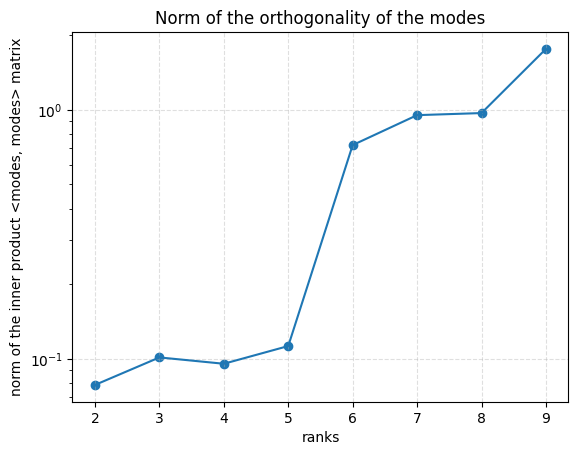

In [83]:
matNorms = [0.07842001614512013, 0.10111551072851786, 0.09536423695241501, 0.11233134859337891, 0.7197968991484899, 0.9492108561452418, 0.9676009052887693, 1.7506578737816438]
ranks = [2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(ranks, matNorms)
plt.scatter(ranks, matNorms)
plt.yscale('log'); plt.grid(linestyle='--', alpha=0.4); plt.title("Norm of the orthogonality of the modes")
plt.ylabel("norm of the inner product <modes, modes> matrix"); plt.xlabel("ranks")

For the poisson all these analyzed modes have real eigenvalues. But for the below test cases which  are for the structured Navier--Stokes problem, the modes are mostly related to complex eigenvalues.

Text(0.5, 0, 'ranks')

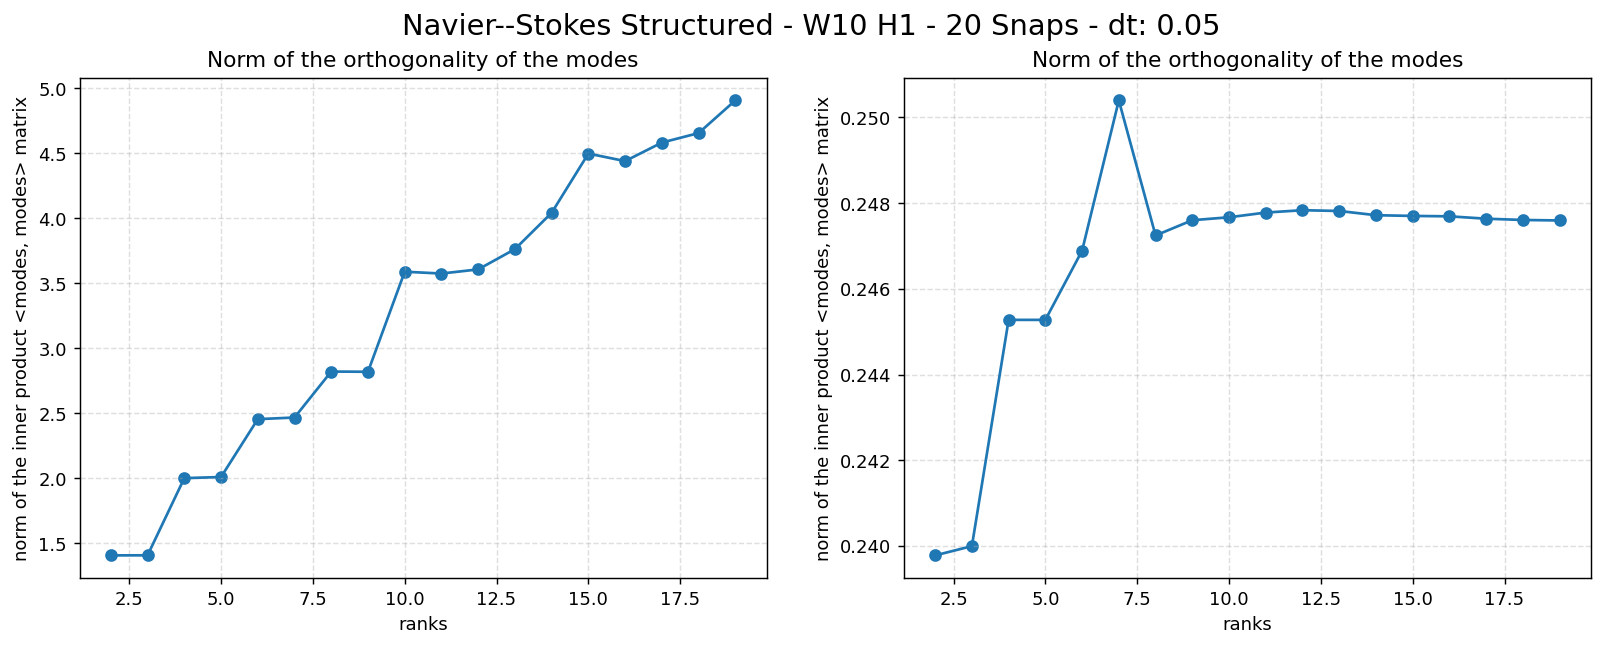

In [98]:
modeNorms = np.genfromtxt("Nav1000_20snap_modeNorms.csv")
updateNorms = np.genfromtxt("Nav1000_20snap_updateNorms.csv")
updateNorms[1] = 0.24 # removing element 3 because it looks like an outlier
ranks = [*range(2,20)]

fig = plt.figure(figsize=(15,5), dpi=130)
rows = 1; cols = 2
fig.suptitle('Navier--Stokes Structured - W10 H1 - 20 Snaps - dt: 0.05', fontsize=16)

ax = fig.add_subplot(rows, cols, 1)
ax.plot(ranks, modeNorms); ax.scatter(ranks, modeNorms)
plt.grid(linestyle='--', alpha=0.4); plt.title("Norm of the orthogonality of the modes")
plt.ylabel("norm of the inner product <modes, modes> matrix"); plt.xlabel("ranks")

ax = fig.add_subplot(rows, cols, 2)
plt.plot(ranks, updateNorms); plt.scatter(ranks, updateNorms)
plt.grid(linestyle='--', alpha=0.4); plt.title("Norm of the orthogonality of the modes")
plt.ylabel("norm of the inner product <modes, modes> matrix"); plt.xlabel("ranks")


After 10 modes the complex conjugate pair is not visible from the norms of the DMD modes (their dot product result)<br>
Also from the right figure, which shows the inner product of updates with DMD modes $<update, DMD modes>$, we can see that after 8 modes the pattern changes. In this test case after 8 modes the result doesn't change much, and using 8 modes is enough.


Text(0.5, 0, 'ranks')

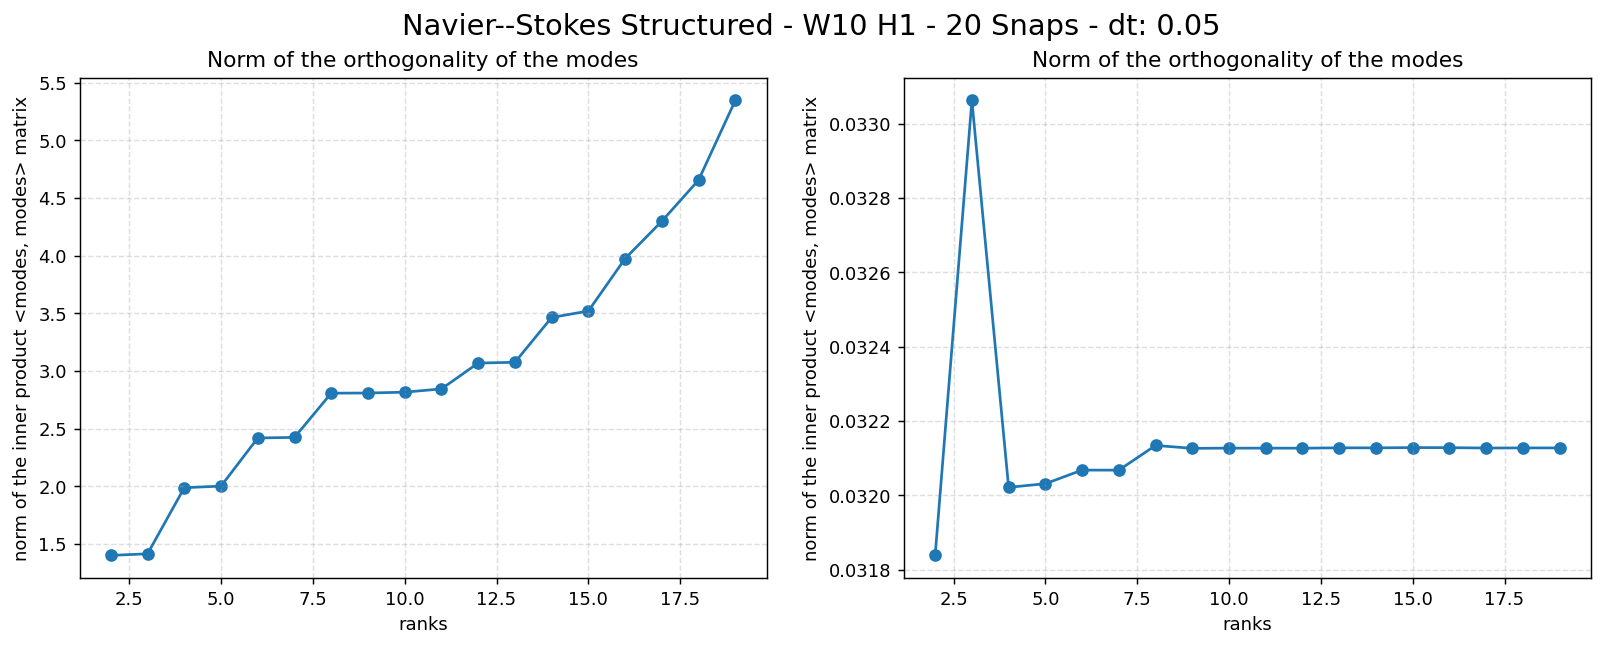

In [96]:
modeNorms = np.genfromtxt("Nav1000_20snap_w5_modeNorms.csv")
updateNorms = np.genfromtxt("Nav1000_20snap_w5_updateNorms.csv")
ranks = [*range(2,20)]

fig = plt.figure(figsize=(15,5), dpi=130)
rows = 1; cols = 2
fig.suptitle('Navier--Stokes Structured - W10 H1 - 20 Snaps - dt: 0.05', fontsize=16)

ax = fig.add_subplot(rows, cols, 1)
ax.plot(ranks, modeNorms); ax.scatter(ranks, modeNorms)
plt.grid(linestyle='--', alpha=0.4); plt.title("Norm of the orthogonality of the modes")
plt.ylabel("norm of the inner product <modes, modes> matrix"); plt.xlabel("ranks")

ax = fig.add_subplot(rows, cols, 2)
plt.plot(ranks, updateNorms); plt.scatter(ranks, updateNorms)
plt.grid(linestyle='--', alpha=0.4); plt.title("Norm of the orthogonality of the modes")
plt.ylabel("norm of the inner product <modes, modes> matrix"); plt.xlabel("ranks")


For this test case which is for the Navier--Stokes of Width 5, using more than 8 modes is of no use.

## 2. Tests on Turbulent Roe 2D

In [3]:
display(HTML("<table><tr><td><img src='RoeTurb2D_badUpdates.png' width=600></td><td><img src='RoeTurb2D_badUpdates_moregeneral.png' width=600></td></tr></table>"))

,


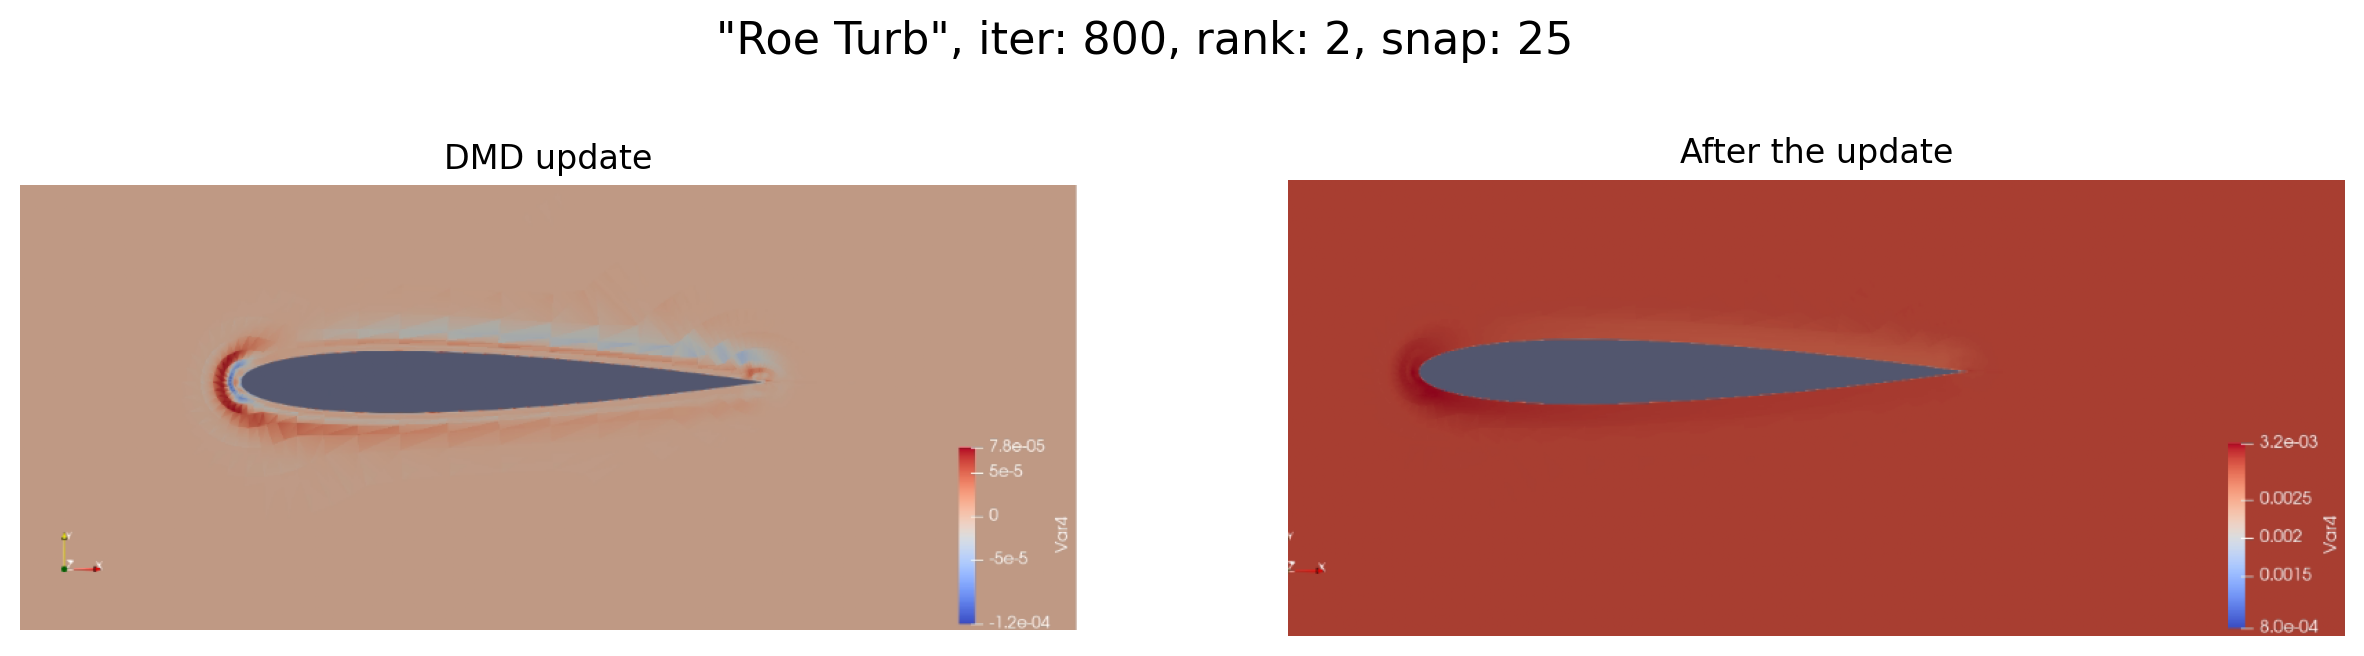

In [32]:
fig = plt.figure(figsize=(15,4), dpi=200)

rows = 1; cols = 2
fig.suptitle('"Roe Turb", iter: 800, rank: 2, snap: 25', fontsize=16)

ax = fig.add_subplot(rows, cols, 1)
image1 = mpimg.imread('dmd_iter800_r2_snap25_update.png')
plt.imshow(image1)
plt.axis('off')
plt.title('DMD update')

ax = fig.add_subplot(rows, cols, 2)
image1 = mpimg.imread('dmd_iter800_r2_snap25_afterUpdate.png')
plt.imshow(image1)
plt.axis('off')
plt.title('After the update')

plt.show()

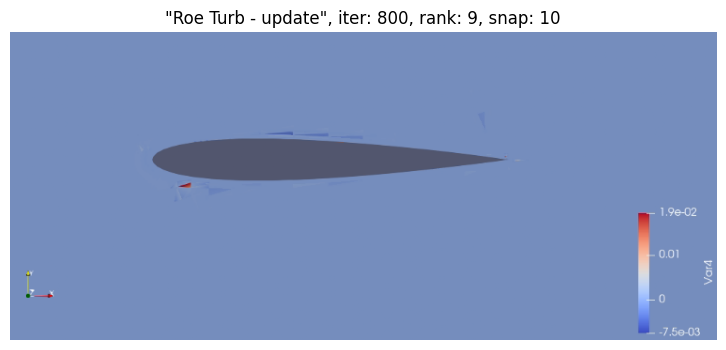

In [31]:
fig = plt.figure(figsize=(15,4), dpi=100)

image1 = mpimg.imread('dmd_iter800_r9_snap10_afterUpdate.png')
plt.imshow(image1)
plt.axis('off')
plt.title('"Roe Turb - update", iter: 800, rank: 9, snap: 10')
plt.show()

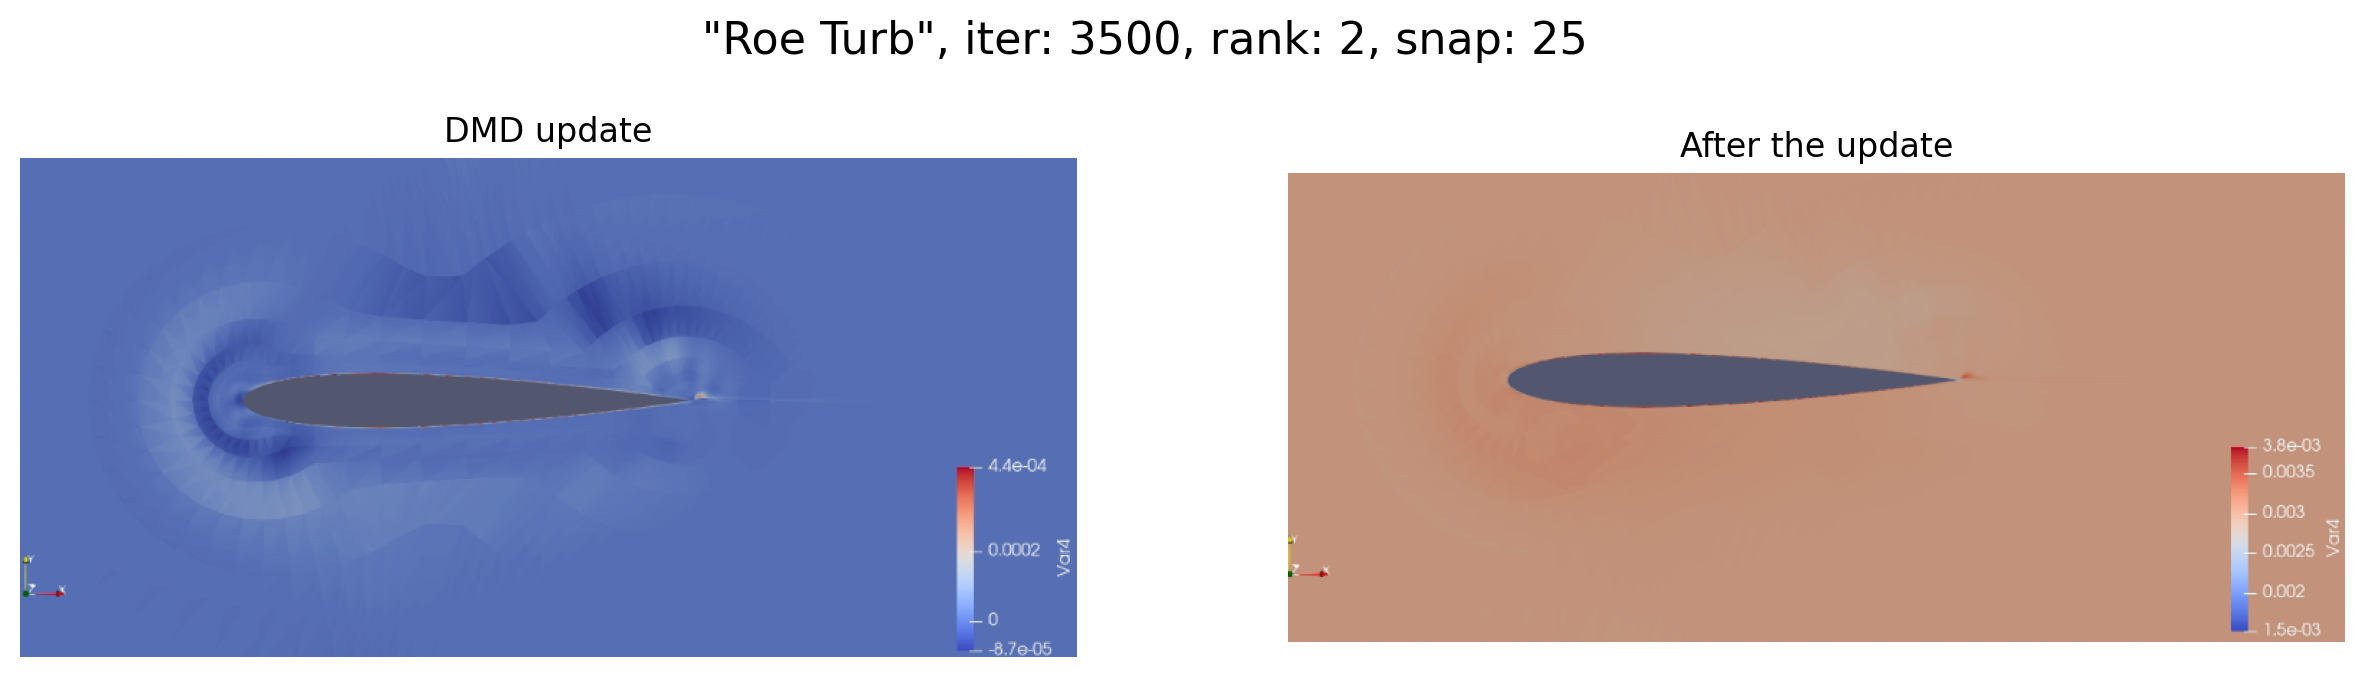

In [30]:
fig = plt.figure(figsize=(15,4), dpi=200)

rows = 1; cols = 2
fig.suptitle('"Roe Turb", iter: 3500, rank: 2, snap: 25', fontsize=16)

ax = fig.add_subplot(rows, cols, 1)
image1 = mpimg.imread('dmd_iter3500_r2_snap25_update.png')
plt.imshow(image1)
plt.axis('off')
plt.title('DMD update')

ax = fig.add_subplot(rows, cols, 2)
image1 = mpimg.imread('dmd_iter3500_r2_snap25_afterUpdate.png')
plt.imshow(image1)
plt.axis('off')
plt.title('After the update')

plt.show()

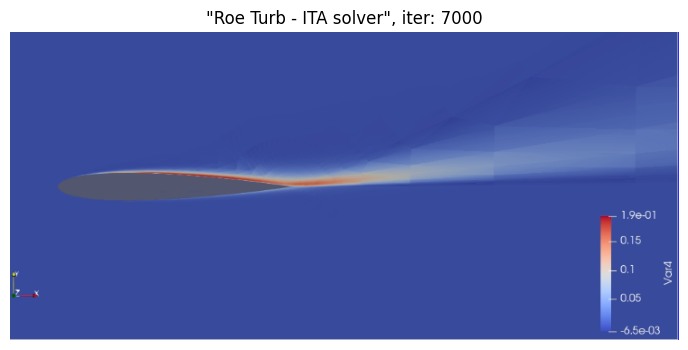

In [29]:
fig = plt.figure(figsize=(15,4), dpi=100)

image1 = mpimg.imread('ITA_iter7000.png')
plt.imshow(image1)
plt.axis('off')
plt.title('"Roe Turb - ITA solver", iter: 7000')
plt.show()

 <img src="RoeTurbSA2D_ITA_vs_Krylov.png" width=670 alt="DMD limits for added translation"><br><br>


Options that are different for ITA vs Krylov:
- -pre_order 1
- -exnut 1    # Ignore \tilde{nu} entries in the line -search

